Ben Steves, CS344, Spring 2022, 1-31-22

# HW 3 - Generalization

### 1

The two building that I observed were the science building and the Spoelhof center, and there were 41 images - 22 of the Spoelhof center and 19 for the Science building. I took a mix of burst photos and tried to take pictures from different angles. Because of the smaller amount of data available for the Spoelhof center, I instead took some photos of Spoelhof fieldhouse to use as training data. Now, there are 40 images used in training. 

### 2

The science building data collected has a lot of burst photos, and the fieldhouse data has a variety of backgrounds and angles, so preemptively, I'm going to hypothesize that the classifier may be less accurate at classifying the fieldhouse photos. There are 115 images total in the test dataset - 64 of these being the science building and 51 being the fieldhouse. 

### 3

I trained three models in homework 2 and got slightly different results for all, but all did relatively well. Accuracy rate ranges listed below (they are listed as ranges because of epoch training method).

**Model 1 (20% validation)**:     Worst: 37.5%, Best: 100%       

**Model 2 (50% validation)**:     Worst: 60%, Best: 95%

**Model 3 (50% valid, augmentation)**:  Worst: 65%, Best: 85%

We will see how results vary, espcially now with the Spoelhof Center being replaced by the Spoelhof Fieldhouse. 

### 4

In [1]:
from fastai.vision.all import *

In [2]:
train_path = '/home/bjs48/cs344/hw03/train_images'
test_path = '/home/bjs48/cs344/hw03/test_images'

In [3]:
train_files = get_image_files(train_path)
test_files = get_image_files(test_path)

There are 115 test files and 40 train files

In [25]:
set_seed(340, reproducible=True)

In [26]:
buildings = DataBlock(
    #1st is input, 2nd is output or response
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    #splitter=RandomSplitter(valid_pct=0.2, seed=94),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [27]:
train_dls = buildings.dataloaders(train_path, bs = 16)
#test_dls = buildings.dataloaders(test_path, bs = 4)

test_dl = train_dls.test_dl(test_files, with_labels = True)

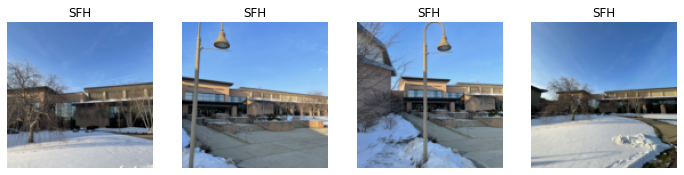

In [28]:
train_dls.valid.show_batch(max_n = 4, nrows = 1)

In [29]:
learnBuildings = cnn_learner(
    dls=train_dls,
    arch=resnet18,
    metrics=accuracy
)
learnBuildings.fine_tune(epochs=4)

epoch,train_loss,valid_loss,accuracy,time
0,0.804504,0.896828,0.625000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.478840,0.620901,0.750000,00:04
1,0.505347,0.278477,0.750000,00:04
2,0.473476,0.112592,1.000000,00:04
3,0.361886,0.061917,1.000000,00:04


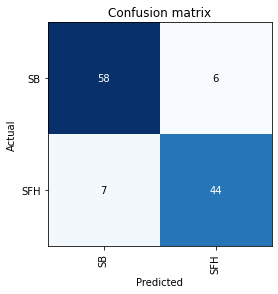

In [30]:
interp = ClassificationInterpretation.from_learner(learnBuildings, dl=test_dl)
interp.plot_confusion_matrix()

In [31]:
interp.print_classification_report()

              precision    recall  f1-score   support

          SB       0.89      0.91      0.90        64
         SFH       0.88      0.86      0.87        51

    accuracy                           0.89       115
   macro avg       0.89      0.88      0.89       115
weighted avg       0.89      0.89      0.89       115



On the test data, the accuracy overall is 89%, and accuracy is 91% with the science building and 86% with the fieldhouse. 

### 5

Between this method and the past method (using train/test split), the accuracies are overall relatively similar, though of course there more test data in this particular classifier. On the augmented data in homework 2, I acheived an accuracy of 85% overall, and accuracy was 89% for this set.

### 6

While I felt that the results of this model fit within the range from the last homework, I also felt that pulling data from different people made a difference in the model results. Different people took pictures differently - at various times of day, angles, and quantities. I think this made it hard for the model to classify accurately at times. 

In experimenting with the seed value, I came to find some seed numbers produced different results - with a seed(11), accuracy of the fieldhouse fell to 66% (though the science building accuracy did go up to 100%). This did uphold my original hypothesis that the model would have a harder time classifying the fieldhouse than the science building. As I stated earlier, there were a lot of burst photos in the science building dataset, and if both classes had about equal variety, I think the model would have been more accurate more often.